# Ý tưởng:
    - Ta sẽ xây dựng một mô hình học sâu (Deep Learning) để làm mô hình dự đoán: Long Short Term Memory là thích hợp. LSTM (Long Short-Term Memory) là một biến thể của mạng neural hồi quy (RNN) được thiết kế để ghi nhớ thông tin trong một khoảng thời gian dài, do đó rất hiệu quả trong việc xử lý các dữ liệu chuỗi thời gian như biến động giá cổ phiếu. Với khả năng lưu giữ và quên thông tin khi cần thiết, LSTM có thể phát hiện các mẫu trong chuỗi thời gian phức tạp và dự đoán tương lai dựa trên dữ liệu quá khứ.
    - Với dữ liệu được cung cấp bao gồm:
        +   Ticker: Ký hiệu cổ phiếu.
        +   Date/Time: Thời gian giao dịch.
        +   Open: Giá mở cửa.
        +   High: Giá cao nhất trong khoảng thời gian.
        +   Low: Giá thấp nhất trong khoảng thời gian.
        +   Close: Giá đóng cửa.
        +   Volume: Khối lượng giao dịch.
        +   Open Interest: Lượng hợp đồng mở.
    - Vì data đã được lấp đầy và không cần làm sạch (nhiễu).
    - Mục tiêu: Dự đoán giá cổ phiếu tại N khoảng thời gian sau (phút, giờ, hoặc ngày) dựa trên các biến số hiện tại và trước đó.
    - Ta sẽ sử dụng thêm một số chỉ báo kĩ thuật dùng trong kinh tế đó là EMA7, EMA30, EMA99 và RSI để kết hợp với mô hình LSTM để có thể dự đoán giá cổ phiếu tương lai. 
        +   EMA7:  Moving Average - Đường trung bình động 7(đơn vị thời gian). 
            -   Ý nghĩa: 
                    +   Phát hiện xu hướng ngắn hạn: MA7 giúp phát hiện các xu hướng ngắn hạn của giá cổ phiếu. Nếu giá nằm trên đường MA7, cổ phiếu có xu hướng tăng ngắn hạn và ngược lại.
                    +   Xác định điểm mua/bán: Khi giá vượt lên trên MA7, đó có thể là tín hiệu mua, và khi giá giảm xuống dưới MA7, đó có thể là tín hiệu bán. 
        +   EMA30: Moving Average - Đường trung bình động 30 (đơn vị thời gian).
            -   Ý nghĩa:
                    +   Nhạy cảm với biến động giá: EMA có ưu điểm hơn MA trong việc nhạy cảm với các biến động giá gần nhất, giúp mô hình nhanh chóng phản ứng với thay đổi xu hướng.
                    +   Xu hướng trung hạn: EMA30 giúp phát hiện xu hướng giá trung hạn, cung cấp thông tin về sự thay đổi xu hướng trong khoảng thời gian lớn hơn MA7.
                    +   Trong LSTM, EMA30 có thể giúp mô hình nhận diện xu hướng trung hạn và các dấu hiệu về động lực giá ở mức độ trung hạn.
        +   EMA99: Moving Average - Đường trung bình động 99 (đơn vị thời gian)
            -   Ý nghĩa:
                    +   Xu hướng dài hạn: EMA99 là một chỉ báo hữu ích để xác định xu hướng dài hạn của cổ phiếu. Nếu giá nằm trên EMA99, thị trường có xu hướng tăng dài hạn, còn nếu nằm dưới, thị trường có xu hướng giảm dài hạn.
                    +   Loại bỏ nhiễu ngắn hạn: EMA99 ít bị ảnh hưởng bởi các biến động ngắn hạn, giúp nhận diện xu hướng bền vững hơn.
                    +   Khi tích hợp vào LSTM, EMA99 cung cấp thêm dữ liệu về xu hướng dài hạn, giúp mô hình không chỉ tập trung vào các tín hiệu ngắn hạn mà còn phản ánh xu hướng dài hạn của cổ phiếu.
        +   RSI: Relative Strength Index - Chỉ số sức mạnh tương đối
            -   Ý nghĩa:RSI đo lường tốc độ và sự thay đổi của giá cổ phiếu, với giá trị từ 0 đến 100. Thông thường, một cổ phiếu được coi là quá mua khi RSI trên 70 và quá bán khi dưới 30.
            -   ứng dụng trong LSTM: Phát hiện tín hiệu đảo chiều: Khi RSI cao, điều này có thể báo hiệu sự điều chỉnh giảm của cổ phiếu, trong khi RSI thấp có thể báo hiệu sự đảo chiều tăng giá. Phân tích động lực giá: RSI cung cấp thông tin về sự mạnh yếu của xu hướng hiện tại, giúp mô hình LSTM hiểu rõ hơn về khả năng duy trì hoặc đảo chiều của xu hướng giá (quá mua hoặc quá bán).
    => Các chỉ số trên dựa vào tính chất mức độ lưu trữ thông tin dài hạn của LSTM, nó tăng cường thông tin xu hướng: Các chỉ báo MA, EMA giúp mô hình LSTM hiểu rõ hơn về xu hướng ngắn, trung và dài hạn. Mô hình không chỉ dựa vào giá cổ phiếu đơn thuần mà còn nhận diện được các động thái quan trọng về sức mạnh và xu hướng giá. Loại bỏ nhiễu: Chỉ báo như EMA99 giúp loại bỏ những biến động ngắn hạn không đáng kể, giúp mô hình LSTM tập trung vào các xu hướng bền vững hơn.Tối ưu dự đoán: Khi tích hợp các chỉ số này vào mô hình, LSTM có thể học các mẫu phức tạp hơn từ các chuỗi thời gian, tối ưu hóa dự đoán trong bối cảnh có nhiều yếu tố tác động đến biến động giá.
    - Sẽ thử nghiệm thêm một mô hình Ensemble Learning đồng bộ đó là Random Forest.
# NHẬN XÉT:
    - LSTM (ở bước nhảy thời gian dự đoán 60 phút) có khả năng dự đoán tốt hơn so với mô hình Random Forest vì LSTM có cơ chế lưu trữ thông tin dài hạn nó có ích cho việc dự đoán giá cổ phiếu.

    

# dự đoán giá cổ phiếu trên mô hình DL là LSTM

Epoch 1/10


C:\Users\thodo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2190/2190 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - loss: 0.0050 - val_loss: 2.5137e-05
Epoch 2/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - loss: 4.4151e-05 - val_loss: 3.0849e-05
Epoch 3/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - loss: 3.6924e-05 - val_loss: 1.2639e-05
Epoch 4/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - loss: 3.0079e-05 - val_loss: 4.8412e-05
Epoch 5/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - loss: 2.0993e-05 - val_loss: 9.8097e-06
Epoch 6/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 1.8881e-05 - val_loss: 5.6111e-06
Epoch 7/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 1.5799e-05 - val_loss: 1.1317e-05
Epoch 8/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 1.3657e-05 - val_loss: 5.5742e-06
Epoch 9/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 1.2500e-05 - val_loss: 7.0405e-06
Epoch 10/10
2190/2190 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 1.1822e-05 - val_loss: 5.5469e-06
607/607 ━━━━━━━━━━━━━━━━━━━━ 4s 7m

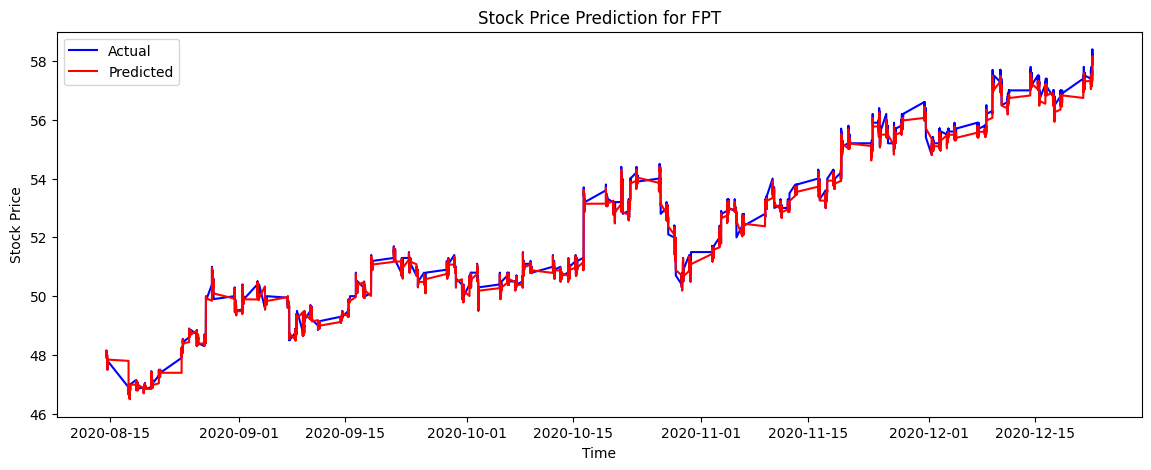

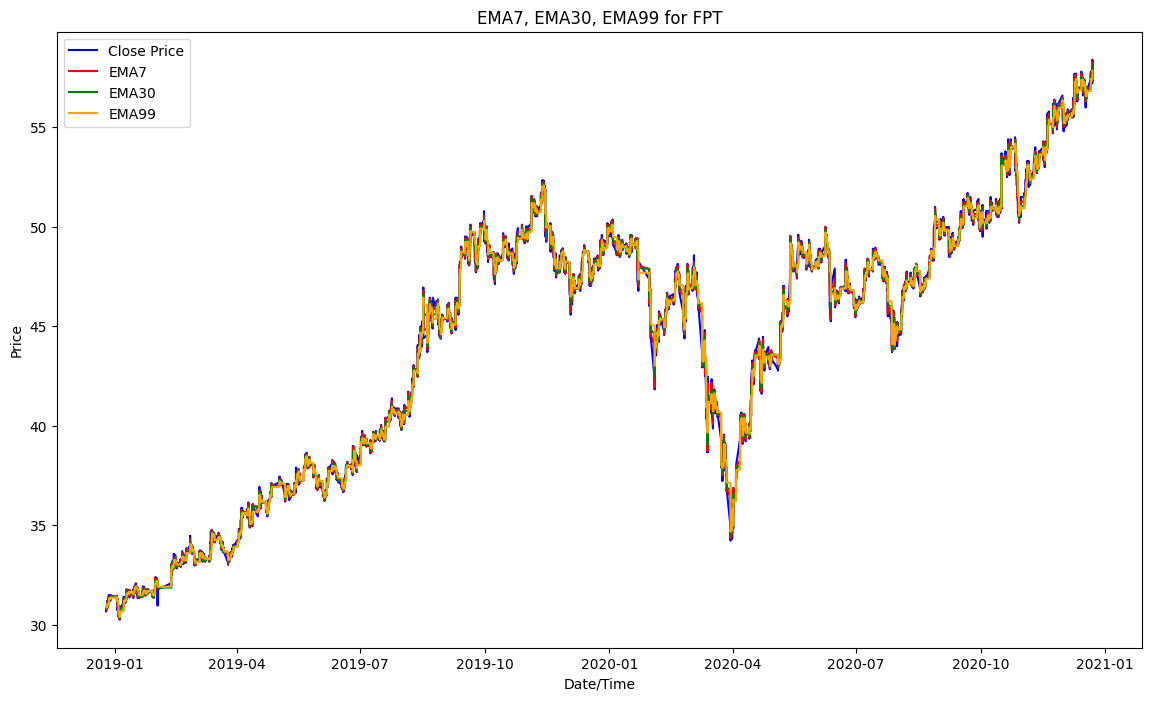

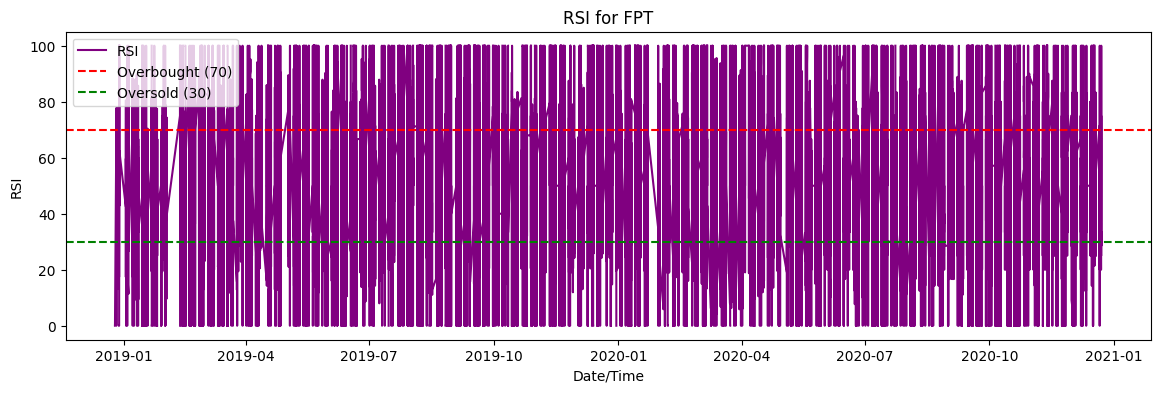

Epoch 1/10


C:\Users\thodo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3044/3044 ━━━━━━━━━━━━━━━━━━━━ 63s 20ms/step - loss: 0.0028 - val_loss: 1.6707e-05
Epoch 2/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - loss: 2.8496e-05 - val_loss: 8.9783e-06
Epoch 3/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 64s 21ms/step - loss: 2.2083e-05 - val_loss: 8.9189e-06
Epoch 4/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - loss: 1.7202e-05 - val_loss: 4.4172e-06
Epoch 5/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - loss: 1.3404e-05 - val_loss: 2.8400e-06
Epoch 6/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - loss: 1.2760e-05 - val_loss: 2.7177e-06
Epoch 7/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - loss: 1.1961e-05 - val_loss: 1.6315e-05
Epoch 8/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - loss: 1.2557e-05 - val_loss: 3.9056e-06
Epoch 9/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 1.1314e-05 - val_loss: 1.0493e-05
Epoch 10/10
3044/3044 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - loss: 1.0683e-05 - val_loss: 2.3903e-06
845/845 ━━━━━━━━━━━━━━━━━━━━ 5s 6m

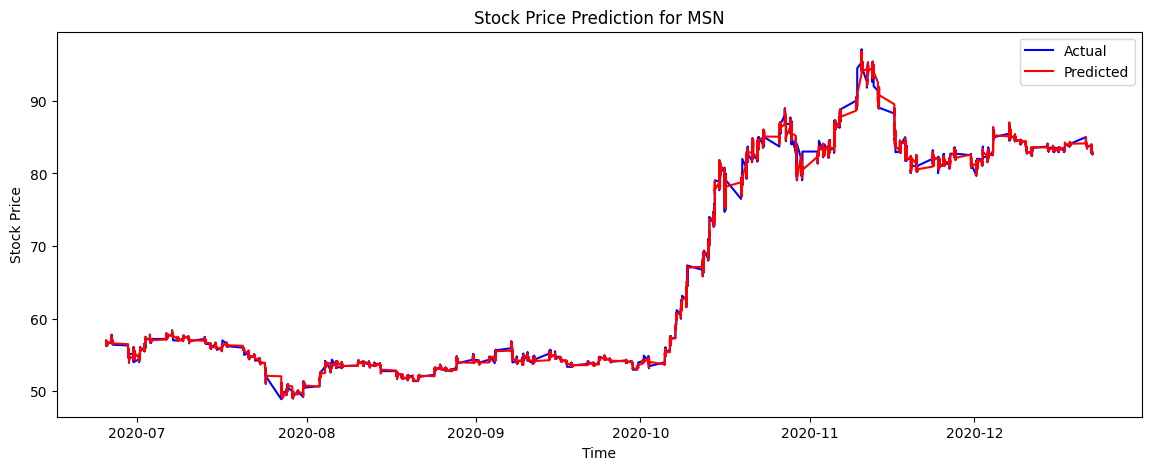

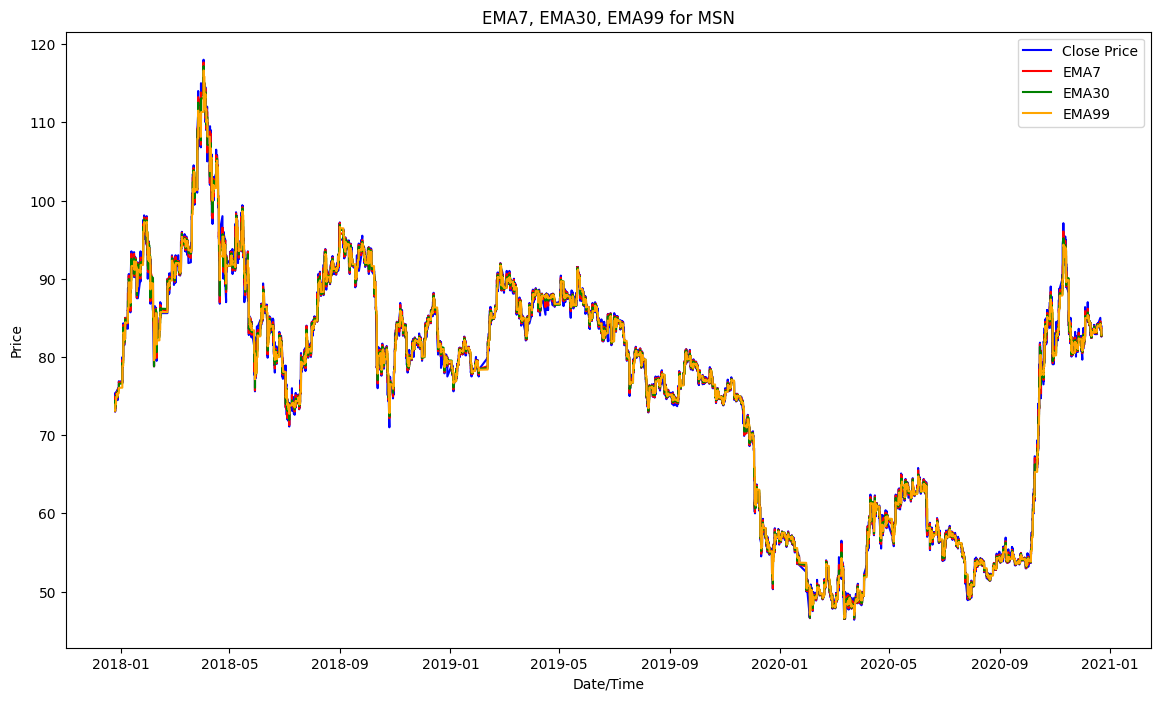

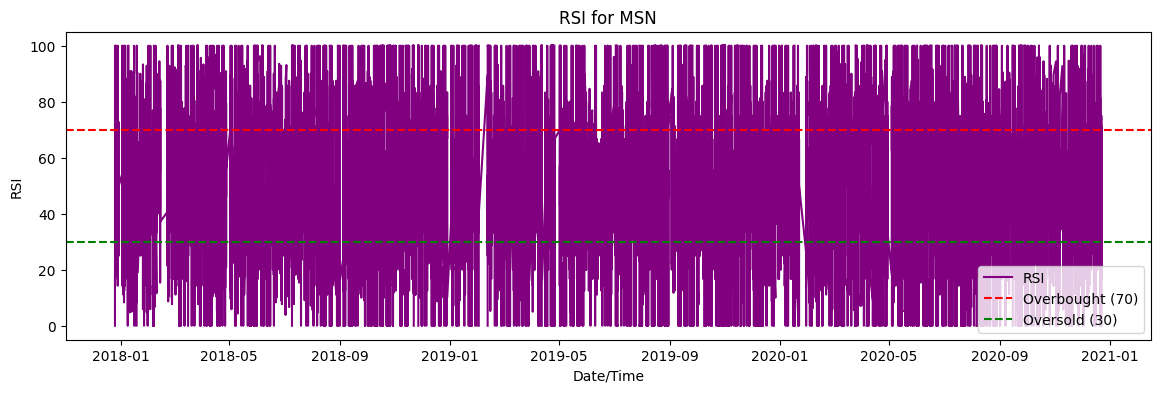

Epoch 1/10


C:\Users\thodo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2818/2818 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - loss: 0.0029 - val_loss: 2.5431e-05
Epoch 2/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - loss: 1.6821e-04 - val_loss: 1.1615e-05
Epoch 3/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - loss: 1.6398e-04 - val_loss: 1.6344e-05
Epoch 4/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - loss: 1.5207e-04 - val_loss: 9.3320e-06
Epoch 5/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 66s 23ms/step - loss: 1.5064e-04 - val_loss: 8.4758e-06
Epoch 6/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step - loss: 1.4737e-04 - val_loss: 1.3936e-05
Epoch 7/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step - loss: 1.4485e-04 - val_loss: 2.6855e-05
Epoch 8/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 65s 23ms/step - loss: 1.4683e-04 - val_loss: 8.9640e-06
Epoch 9/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 66s 23ms/step - loss: 1.4608e-04 - val_loss: 6.2072e-06
Epoch 10/10
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 68s 24ms/step - loss: 1.4253e-04 - val_loss: 3.9524e-05
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8m

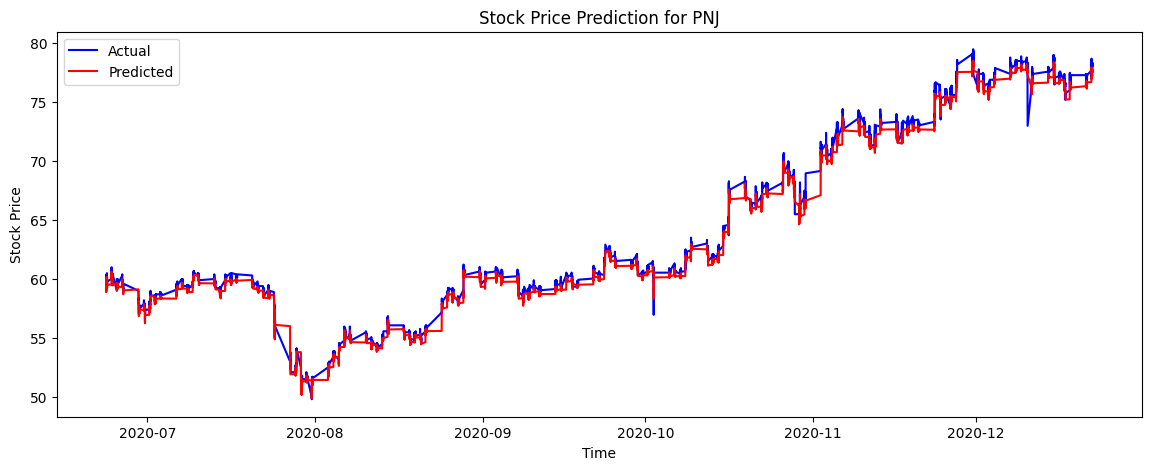

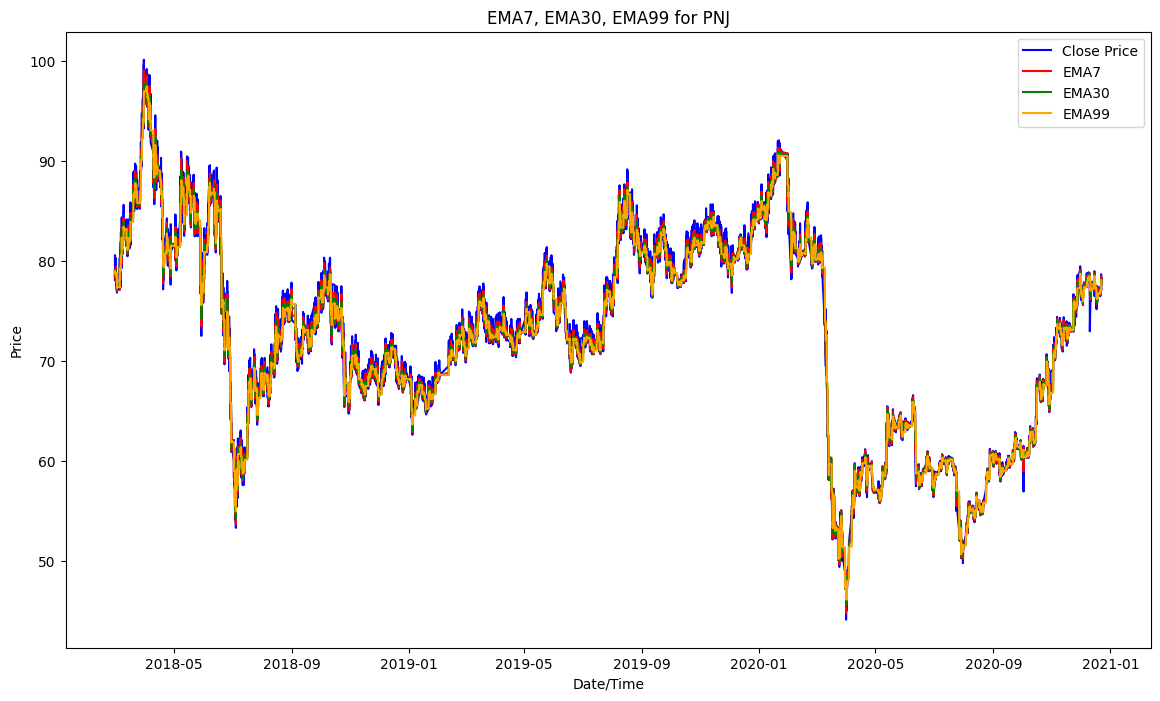

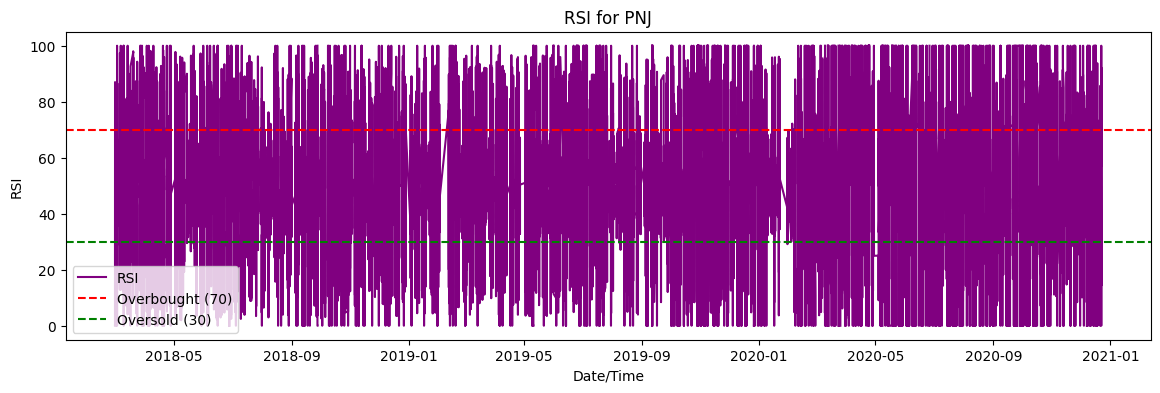

Epoch 1/10


C:\Users\thodo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2277/2277 ━━━━━━━━━━━━━━━━━━━━ 56s 24ms/step - loss: 0.0103 - val_loss: 2.9611e-05
Epoch 2/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 3.8265e-05 - val_loss: 3.5636e-05
Epoch 3/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - loss: 3.8381e-05 - val_loss: 2.3028e-05
Epoch 4/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 3.2627e-05 - val_loss: 1.6274e-05
Epoch 5/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - loss: 2.5391e-05 - val_loss: 1.9844e-05
Epoch 6/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - loss: 1.9787e-05 - val_loss: 1.2343e-05
Epoch 7/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - loss: 1.8372e-05 - val_loss: 1.4395e-05
Epoch 8/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - loss: 1.6228e-05 - val_loss: 1.0674e-05
Epoch 9/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - loss: 1.5916e-05 - val_loss: 1.0983e-05
Epoch 10/10
2277/2277 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - loss: 1.5035e-05 - val_loss: 1.1828e-05
632/632 ━━━━━━━━━━━━━━━━━━━━ 5s 7m

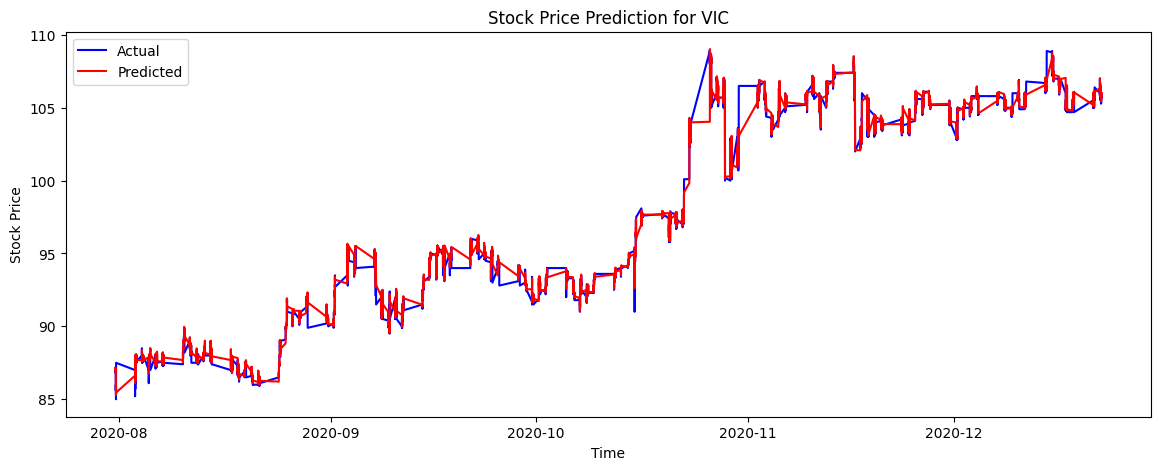

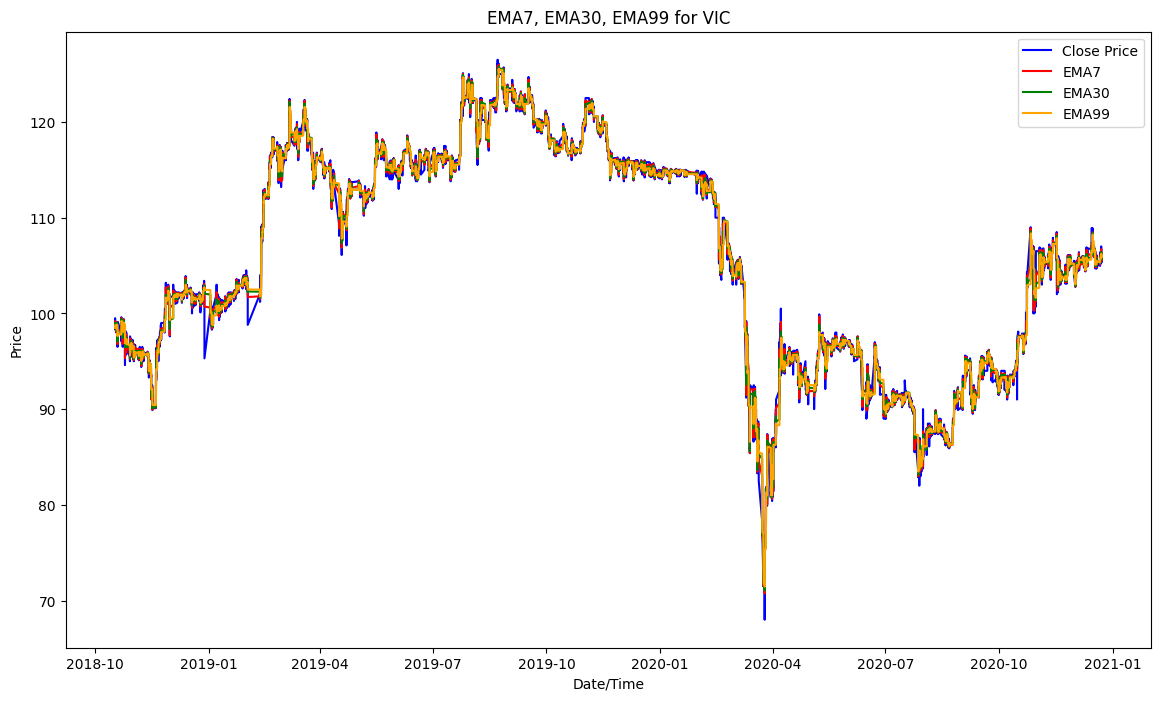

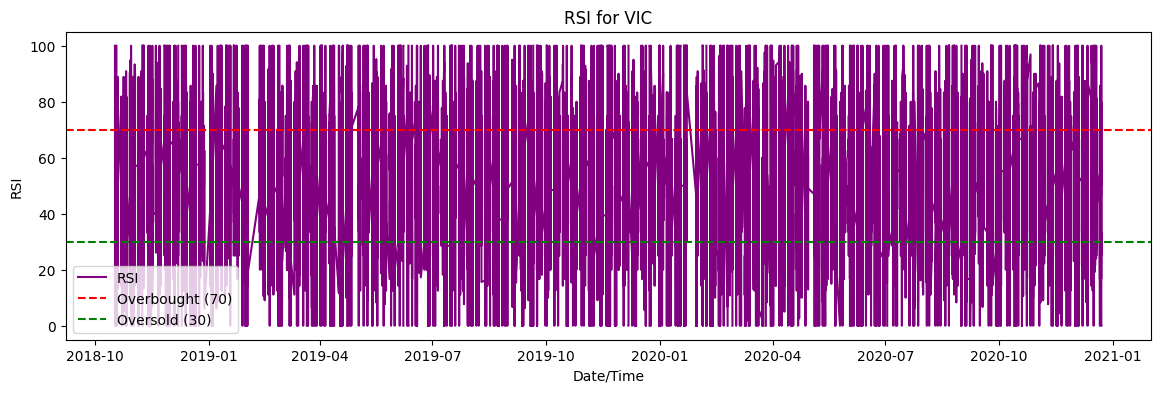

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# List of CSV files and corresponding stock symbols
csv_files = ['FPT.csv', 'MSN.csv', 'PNJ.csv', 'VIC.csv']
stock_symbols = ['FPT', 'MSN', 'PNJ', 'VIC']

# Loop through each CSV file and process the data
for file, symbol in zip(csv_files, stock_symbols):
    # Read data from CSV file
    df = pd.read_csv(file)

    # Convert 'Date/Time' column to datetime and set it as the index
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date/Time', inplace=True)

    # Calculate EMA7, EMA30, EMA99
    df['EMA7'] = df['Close'].ewm(span=7, adjust=False).mean()
    df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()
    df['EMA99'] = df['Close'].ewm(span=99, adjust=False).mean()

    # Function to calculate RSI
    def calculate_rsi(data, window=14):
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).fillna(0)
        loss = (-delta.where(delta < 0, 0)).fillna(0)

        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    # Calculate RSI with a 14-period window
    df['RSI'] = calculate_rsi(df)

    # Prepare data for LSTM model
    data = df[['Close']].values
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    # Function to create datasets for LSTM
    def create_dataset(dataset, time_step=1):
        X, y = [], []
        for i in range(len(dataset) - time_step):
            a = dataset[i:(i + time_step), 0]
            X.append(a)
            y.append(dataset[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 60  # Predictive Time Jump

    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(32, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

    # Predict stock prices using the trained model
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Inverse transform y_test to compare with predictions
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the comparison between actual and predicted prices
    plt.figure(figsize=(14, 5))
    plt.plot(df.index[-len(y_test_inv):], y_test_inv, color='blue', label='Actual')
    plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted')
    plt.title(f'Stock Price Prediction for {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Plot the EMA lines
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['EMA7'], label='EMA7', color='red')
    plt.plot(df.index, df['EMA30'], label='EMA30', color='green')
    plt.plot(df.index, df['EMA99'], label='EMA99', color='orange')

    plt.title(f'EMA7, EMA30, EMA99 for {symbol}')
    plt.xlabel('Date/Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot the RSI chart
    plt.figure(figsize=(14, 4))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    plt.title(f'RSI for {symbol}')
    plt.xlabel('Date/Time')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()


# DỰ ĐOÁN GIÁ CỔ PHIẾU DỰA TRÊN RANDOM FOREST

MSE for FPT: 4.831564016717109


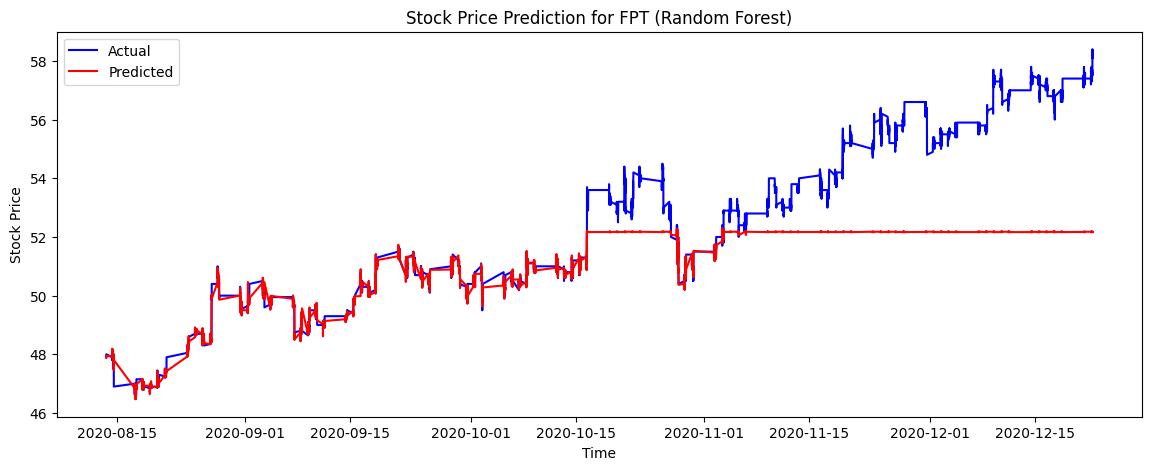

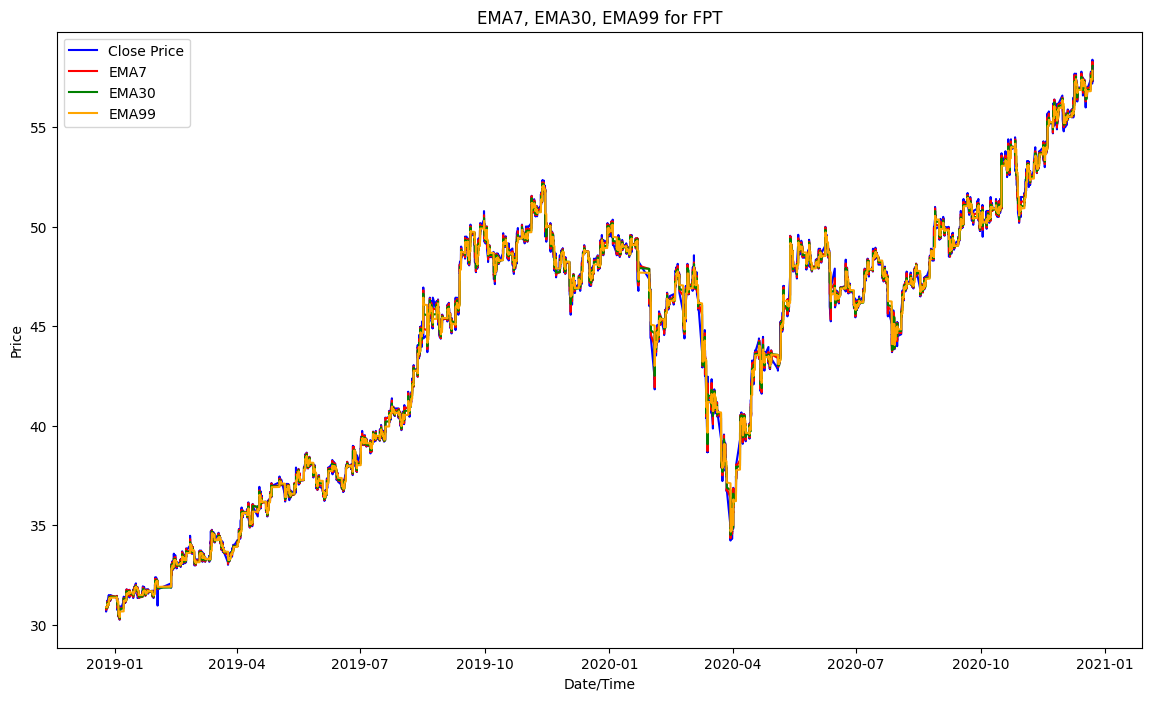

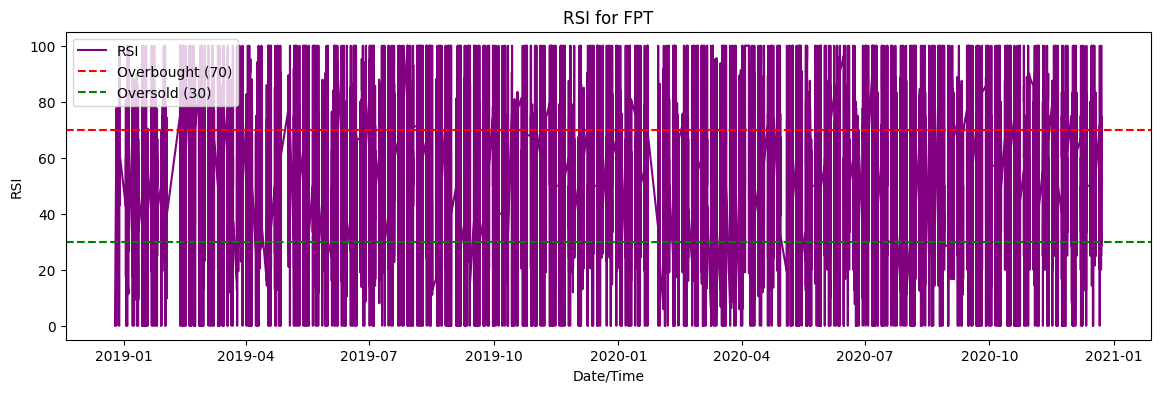

MSE for MSN: 0.09132651993278319


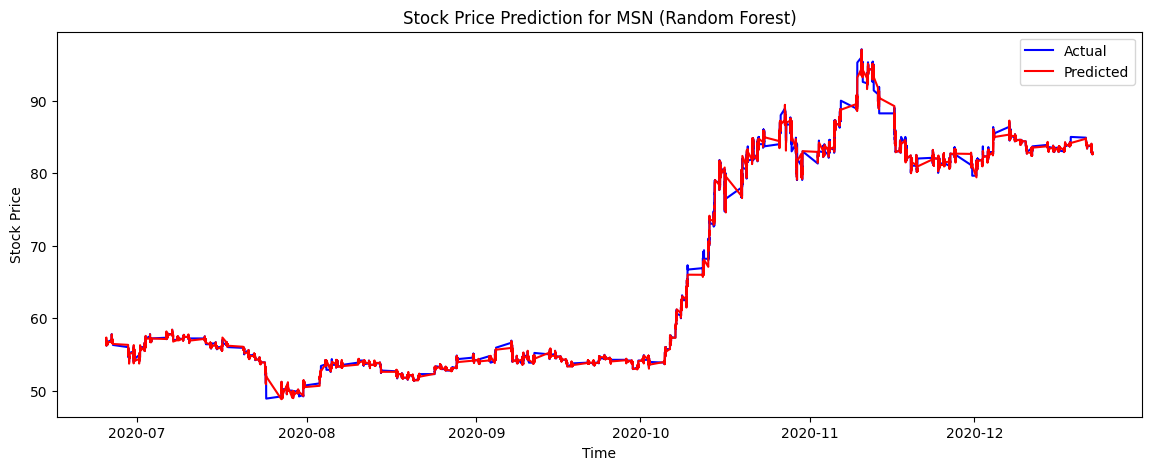

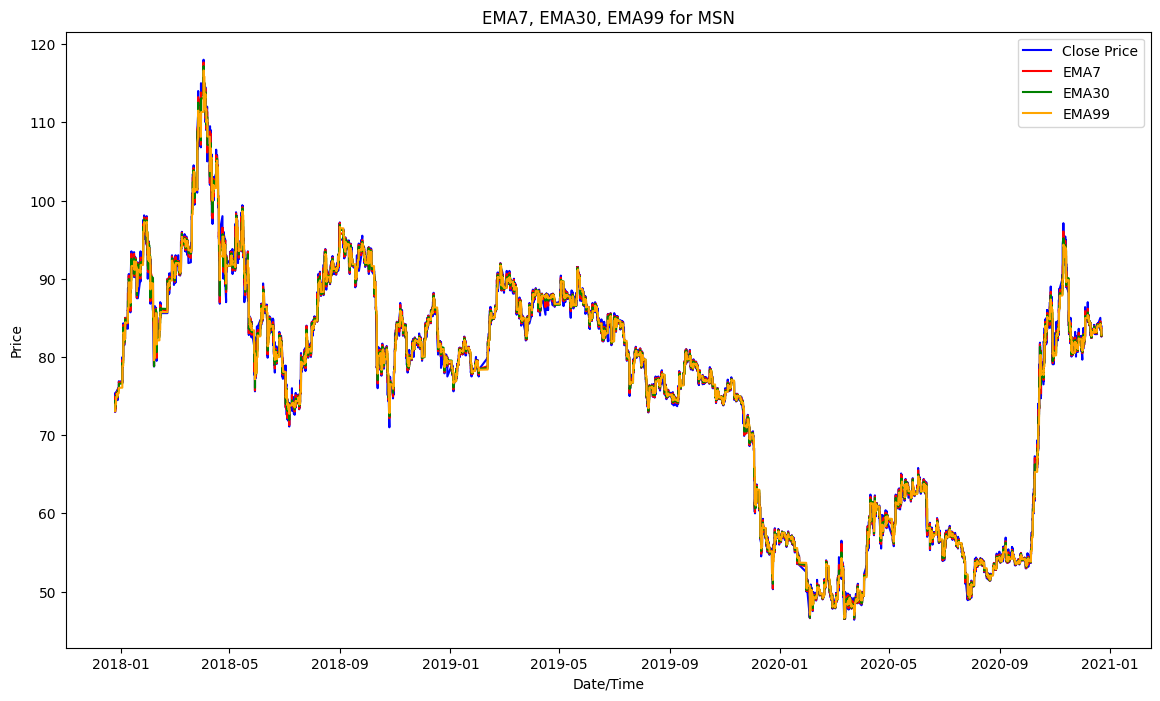

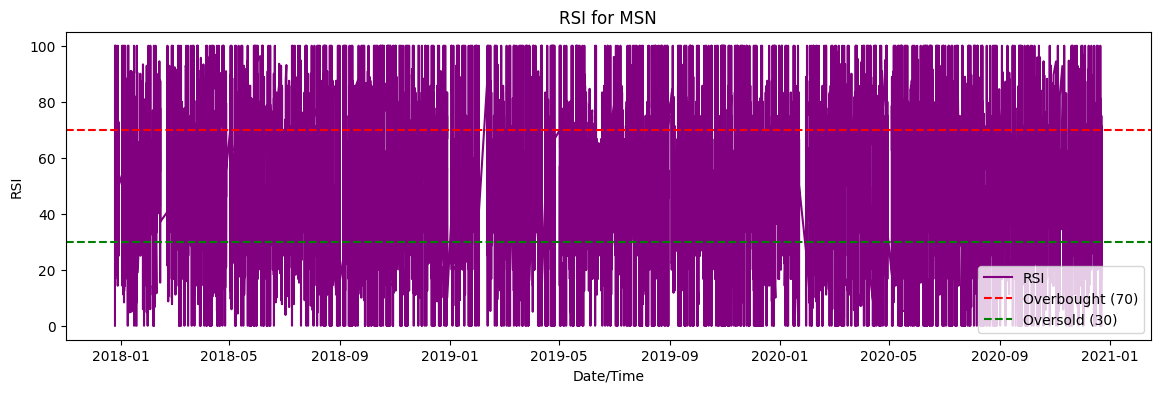

MSE for PNJ: 0.0666506954589222


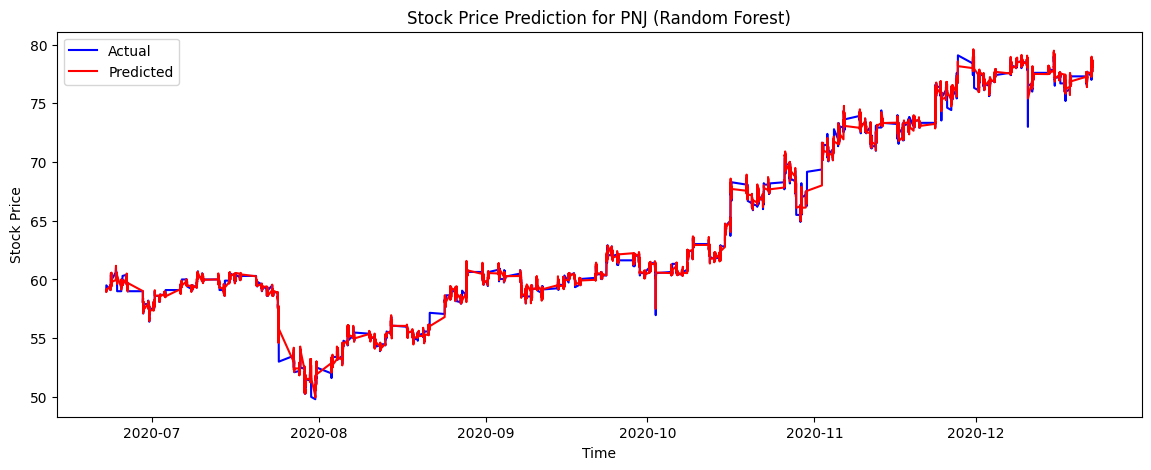

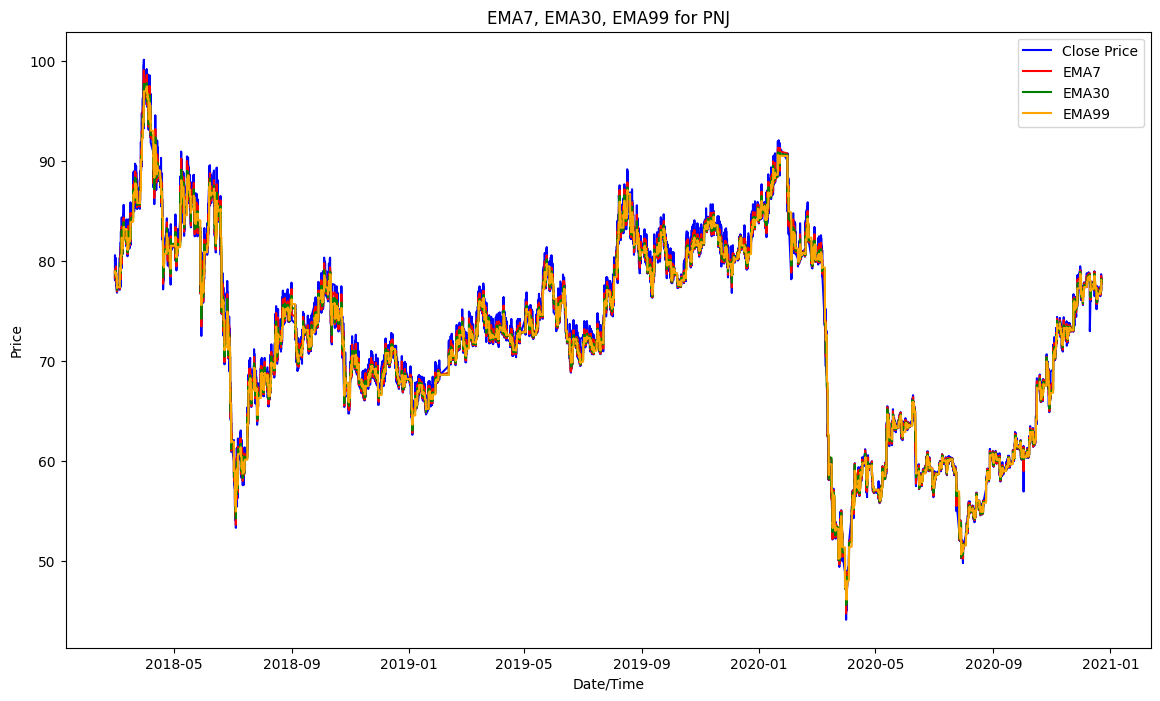

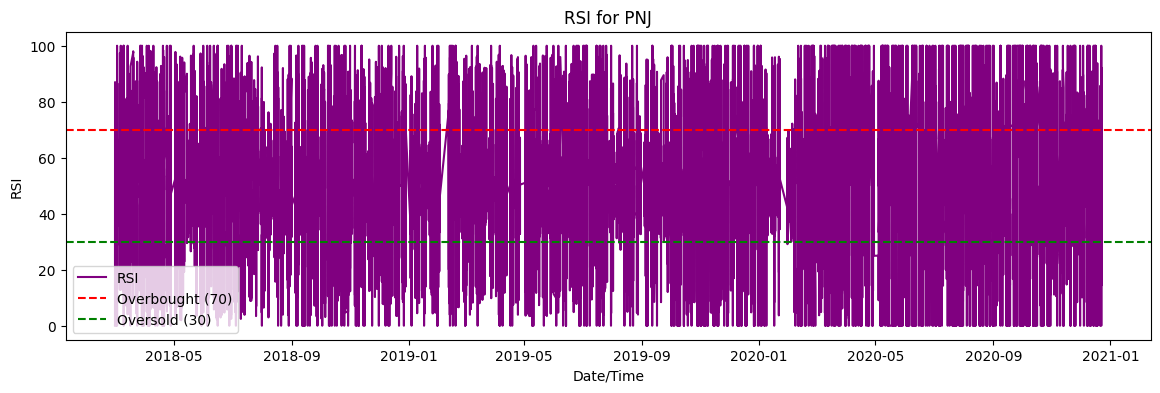

MSE for VIC: 0.051916039195230856


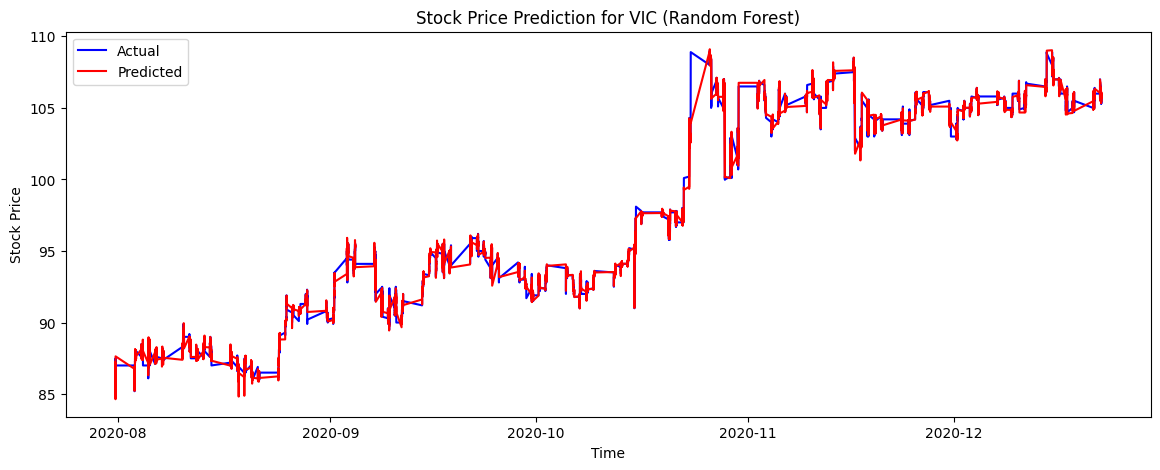

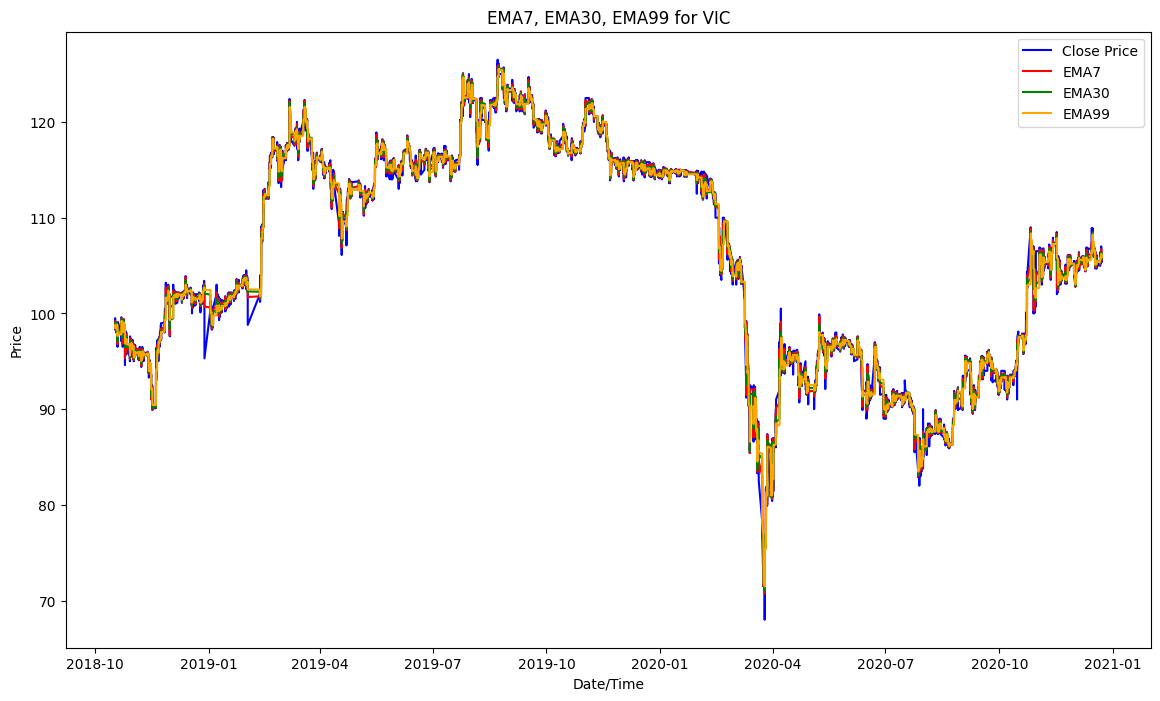

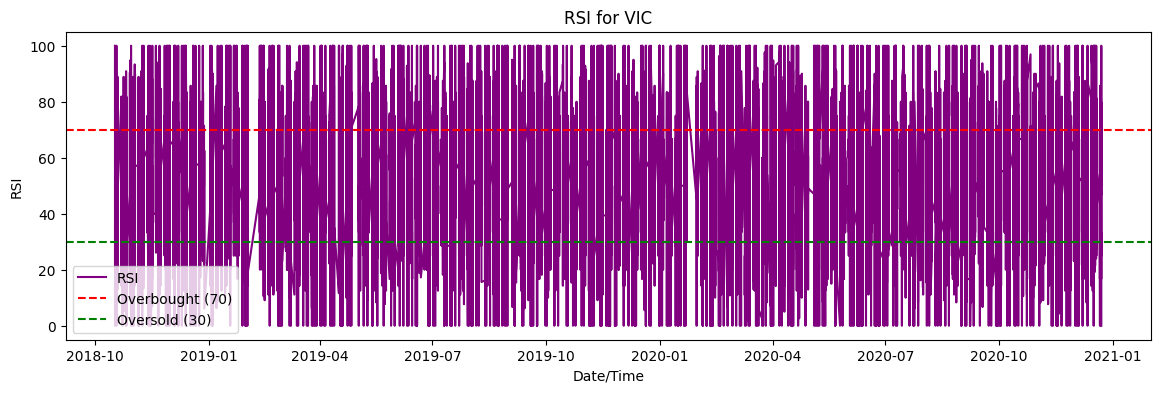

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# List of CSV files and corresponding stock symbols
csv_files = ['FPT.csv', 'MSN.csv', 'PNJ.csv', 'VIC.csv']
stock_symbols = ['FPT', 'MSN', 'PNJ', 'VIC']

# Loop through each CSV file and process the data
for file, symbol in zip(csv_files, stock_symbols):
    # Read data from CSV file
    df = pd.read_csv(file)

    # Convert 'Date/Time' column to datetime and set it as the index
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date/Time', inplace=True)

    # Calculate EMA7, EMA30, EMA99
    df['EMA7'] = df['Close'].ewm(span=7, adjust=False).mean()
    df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()
    df['EMA99'] = df['Close'].ewm(span=99, adjust=False).mean()

    # Function to calculate RSI
    def calculate_rsi(data, window=14):
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).fillna(0)
        loss = (-delta.where(delta < 0, 0)).fillna(0)

        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()

        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    # Calculate RSI with a 14-period window
    df['RSI'] = calculate_rsi(df)

    # Prepare data for Random Forest model
    df['Target'] = df['Close'].shift(-1)  # Predict the next close price
    df.dropna(inplace=True)

    # Define feature set (X) and target (y)
    features = ['Close', 'EMA7', 'EMA30', 'EMA99', 'RSI']
    X = df[features]
    y = df['Target']

    # Split data into training and test sets (80% train, 20% test)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Normalize the feature data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict stock prices using the trained model
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE for {symbol}: {mse}')

    # Plot the comparison between actual and predicted prices
    plt.figure(figsize=(14, 5))
    plt.plot(df.index[-len(y_test):], y_test, color='blue', label='Actual')
    plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted')
    plt.title(f'Stock Price Prediction for {symbol} (Random Forest)')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Plot the EMA lines
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['EMA7'], label='EMA7', color='red')
    plt.plot(df.index, df['EMA30'], label='EMA30', color='green')
    plt.plot(df.index, df['EMA99'], label='EMA99', color='orange')

    plt.title(f'EMA7, EMA30, EMA99 for {symbol}')
    plt.xlabel('Date/Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot the RSI chart
    plt.figure(figsize=(14, 4))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    plt.title(f'RSI for {symbol}')
    plt.xlabel('Date/Time')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()
